## Economic Data Analysis using FRED and Pandas

In [50]:
##import the needed tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred 

#Set default plotting style
plt.style.use('fivethirtyeight')
#Change color palatte here | this will pull the default colors from whatever theme you are using in matplotlib
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#For demonstration purpose I will put this open source API key here, generally speaking this would be ignored
fred_key = "4e281a872f4449a663024303ec80198f"

### 1. Create the FRED object

In [51]:
#The Fred object is the object that will be doing most of the pulling down and accessing data
fred = Fred(api_key=fred_key)

### 2. Search for economic data

In [52]:
#It's import to note that with the fred object. When you call the search method, it's similar to searching with a search bar\
#It will return the data as a dataframe
#When you pull the data it's most like clicking and downloading a CSV
sp_search = fred.search('S&P', order_by = 'popularity')
#This will provide a data frame that contains the search value results | sorted by popularity


### 3. Pull raw data & plot

<AxesSubplot:title={'center':'S&P 500'}>

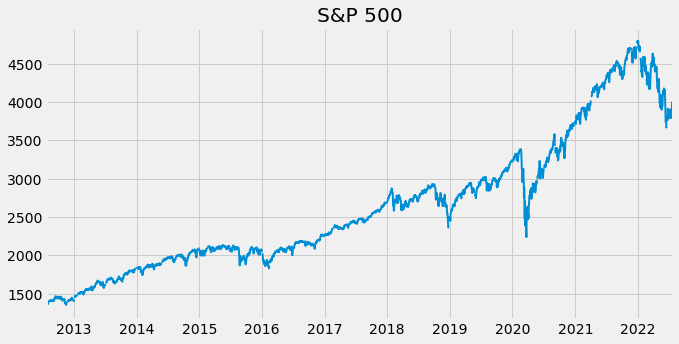

In [53]:
sp500 = fred.get_series(series_id = "SP500")

sp500.plot(figsize=(10, 5), title='S&P 500',lw=2)

### 4. Pull and Join Multiple data Series

<AxesSubplot:title={'center':'Seasonally adjusted unemployment rate'}>

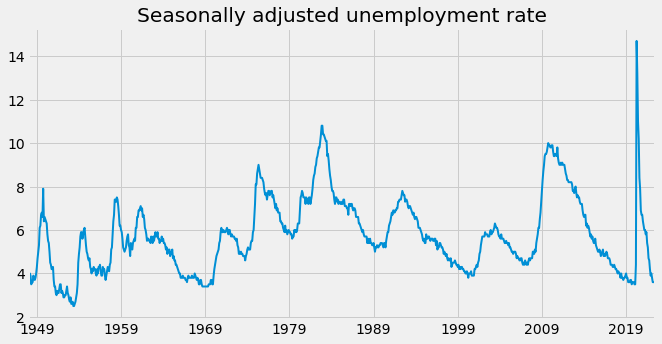

In [54]:
uemp_results = fred.search('unemployment')

unrate =  fred.get_series('UNRATE')

unrate.plot(figsize=(10,5), title='Seasonally adjusted unemployment rate', lw=2)



In [55]:
#check for more specific unemployment data
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

#Filtering the unemp_df set some
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

#Further filtering to find the rate in the title

unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [56]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)

In [57]:
#I need to pull data that cooresponds to states only
#After checking the data UR is in each column that represents each state. 
unemp_results_cols = [col for col in unemp_results.columns if 'UR' not in col]
print(unemp_results_cols)
unemp_results = unemp_results.drop(['UNRATE', 'LNS14000006', 'LNS14000031', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000024', 'LNS14000002', 'U2RATE', 'LNS14000009', 'LNS14000003', 'LNS14000001', 'LNS14027662', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012', 'LNS14027660', 'LASMT261982000000003', 'LASMT391746000000003', 'LNS14000018', 'LNS14000060', 'LNS14024887', 'LNS14027659', 'LNS14000036', 'LNS14000032', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14000028', 'LRHUTTTTUSM156S', 'LNS14024230', 'LRUNTTTTUSM156S', 'LNS14000029', 'LNS14000026', 'LNS14000150', 'LNS14000048', 'LNS14000315', 'LNS14000025', 'LNS14000089', 'LNS14200000'], axis=1)
unemp_states = unemp_results.dropna()

['UNRATE', 'LNS14000006', 'LNS14000031', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000024', 'U2RATE', 'LNS14000009', 'LNS14000002', 'LNS14000003', 'LNS14027662', 'LRUN64TTUSM156S', 'LNS14000012', 'LNS14000001', 'LNS14027660', 'LNS14032183', 'LASMT261982000000003', 'LASMT391746000000003', 'LNS14000018', 'LNS14000060', 'LNS14024887', 'LNS14027659', 'LRUN24TTUSM156S', 'LNS14000032', 'LNS14000036', 'LRHUTTTTUSM156S', 'LNS14000028', 'LNS14027689', 'LRUNTTTTUSM156S', 'LNS14000048', 'LNS14000029', 'LNS14000315', 'LNS14000025', 'LNS14000089', 'LNS14024230', 'LNS14000026', 'LNS14000150', 'LNS14200000']


In [58]:
# The names are pulling from the name in the FRED data set 
# since the states that are getting pulled are a little bit hard to read

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [59]:
#I want to drop some columns that don't belong with the states.
unemp_states = unemp_states.drop(['CMWRUR','CWSTUR','CSOUUR','CNEWUR','CESCUR'],axis=1)

In [60]:
#Write over column names by using list comprehension
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [61]:
#plot States Unemployment Rate
px.line(unemp_states)

### Pull April 2020 Unemployment Rate Per State


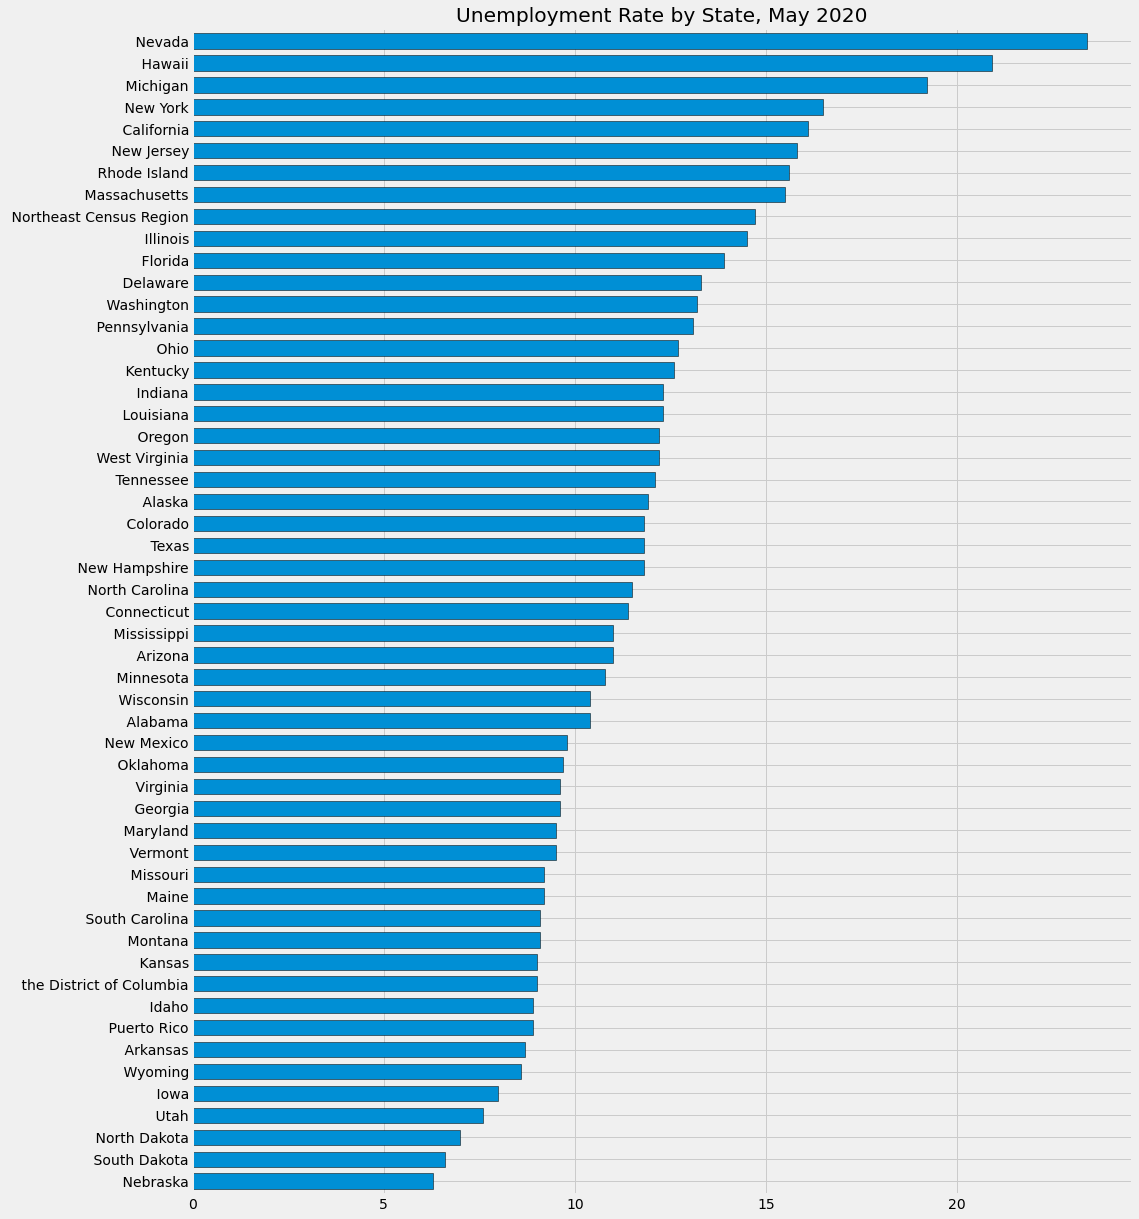

In [73]:
#There is a pretty sharp increase in rates in 2020, most likely due to covid
#I would like to follow up with that data

#The data wont pull for me when I try and locate the index for April. There is a 
#Very big difference between Feburary and May, May being larger, so I will pull that index

ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh', figsize=(15, 20), title= "Unemployment Rate by State, May 2020", width = .7, edgecolor = 'black')
ax.legend().remove()
plt.show()